# Analysis of Selection Methods

We want to  asses the influence of various selection methods on the performance of the GA.

To guarantee an unbiased analysis, we selected eight random combinations of other hyperparameters, namely crossover and mutation operators.

This approach allows us to evaluate each selection method's impact on the algorithm's performance across multiple genetic operators configurations.

By avoiding a restricted analysis based on a single set of crossover and mutation operators, we can obtain more reliable insights into the effects of different selection methods.

Therefore, the _results_ dataframe contains the average best fitness of 30 runs in each generation, for each tested configuration.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results = pd.read_csv('../results/selection_results.csv', index_col = 0)

In [9]:
results.head()

,tournament_selection|gbx_crossover|swap_mutation,tournament_selection|eager_breader_crossover|swap_mutation,tournament_selection|twin_maker|the_hop,tournament_selection|gbx_crossover|merge_and_split,tournament_selection|eager_breader_crossover|the_hop,tournament_selection|twin_maker|dream_team,tournament_selection|twin_maker|merge_and_split,tournament_selection|gbx_crossover|dream_team,fps|gbx_crossover|swap_mutation,fps|eager_breader_crossover|swap_mutation,...,fps|twin_maker|merge_and_split,fps|gbx_crossover|dream_team,ranking_selection|gbx_crossover|swap_mutation,ranking_selection|eager_breader_crossover|swap_mutation,ranking_selection|twin_maker|the_hop,ranking_selection|gbx_crossover|merge_and_split,ranking_selection|eager_breader_crossover|the_hop,ranking_selection|twin_maker|dream_team,ranking_selection|twin_maker|merge_and_split,ranking_selection|gbx_crossover|dream_team
0,34990.000000,44630.000000,23760.000000,35006.666667,44510.000000,26056.666667,24010.000000,35340.000000,33156.666667,41860.000000,...,22000.000000,33813.333333,32820.000000,41773.333333,22000.000000,32723.333333,41183.333333,24216.666667,22900.000000,32903.333333
1,44870.000000,60506.666667,25323.333333,44923.333333,60066.666667,28553.333333,25563.333333,44523.333333,41606.666667,56283.333333,...,23400.000000,41443.333333,40540.000000,54420.000000,23220.000000,39613.333333,55810.000000,26050.000000,23946.666667,41020.000000
2,51193.333333,68846.666667,26613.333333,51470.000000,68443.333333,30263.333333,26620.000000,52776.666667,47646.666667,64386.666667,...,24766.666667,46333.333333,46046.666667,63410.000000,23876.666667,45500.000000,63886.666667,27233.333333,24970.000000,45346.666667
3,57360.000000,73266.666667,27806.666667,57250.000000,72940.000000,31506.666667,27963.333333,57113.333333,52346.666667,69380.000000,...,25703.333333,51370.000000,50610.000000,68270.000000,24646.666667,50030.000000,69310.000000,28660.000000,25223.333333,49836.666667
4,61166.666667,75536.666667,29780.000000,60433.333333,75010.000000,32476.666667,29506.666667,61520.000000,56070.000000,72313.333333,...,26243.333333,53926.666667,54243.333333,71866.666667,25696.666667,54263.333333,72340.000000,29510.000000,26050.000000,53770.000000


## Performances of each selection algorithm

In [10]:
selection_methods = ['tournament', 'fps', 'ranking']

for selection in selection_methods:

    # Filter all columns that contain the selection method (8 columns)
    df = results.filter(regex = selection)

    # Group the performances in a list
    fitness_list = df.apply(lambda row: row.tolist(), axis=1)

    # Save standard deviation
    results[selection + '_std'] = fitness_list.apply(np.std)

    # Save the median
    results[selection + '_median'] = fitness_list.apply(np.median)

In [11]:
selection_results = results.iloc[:, -6:]

selection_results.head()

,tournament_std,tournament_median,fps_std,fps_median,ranking_std,ranking_median
0,7852.484911,33537.916667,7540.205153,31615.833333,7258.613466,31315.000000
1,13326.620908,41791.250000,12635.930554,38810.833333,12060.712936,38077.500000
2,16275.358590,47028.333333,15563.953636,43486.666667,15047.804698,42533.750000
3,17824.443949,50650.833333,17058.672424,46874.166667,16880.397820,45823.333333
4,18367.557823,53178.750000,18113.309487,49131.666667,18003.220757,48467.500000


## Plot the results

In [12]:
def plot_selection_performance(df):
    plt.figure(figsize=(7, 5))

    median_cols = df.filter(regex = 'median').columns

    for median_col in median_cols:
        median = df[median_col]

        # Plot the line of the median
        plt.plot(df.index, median, label=median_col[:-7])

    plt.xlabel('Generation')
    plt.ylabel('Fitness')

    plt.title('Average Performance of Selection Methods')
    plt.legend(fontsize = 10)
    plt.show()

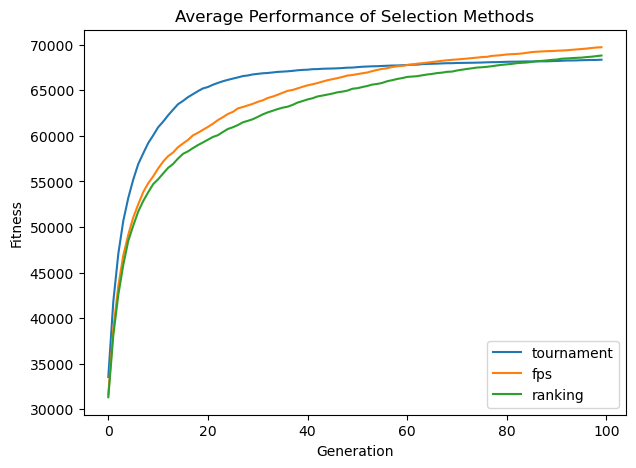

In [13]:
plot_selection_performance(selection_results)